<a href="https://colab.research.google.com/github/rodrigoldiniz/Scripts_Python/blob/master/PIT_II_A_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome**: Rodrigo Lopes Diniz

**RGM**: 22657126

**Instituição**: CRUZEIRO DO SUL - EAD

**Curso**: Superior de tecnologia em ciência de dados

**Atividade II - PROJETO INTEGRADOR TRANSDISCIPLINAR EM CIÊNCIA DE DADOS II - 80h_Turma_01_082020**

**Enunciado**:
No fim do dia, chegou um pedido do pessoal de contas médicas, a partir de um arquivo contendo alguns valores em reais de uma amostra de um faturamento de um hospital. O arquivo é: atividade_PIT_II_ciência_dados (mesmo arquivo da atividade anterior)

Pediram o seguinte a você:
• Carregue o dado;
• Gere um gráfico Q-Q para conferir a distribuição de frequência. A ideia aqui é ver até quando a reta gerada se ajusta aos pontos.


O que deverá ser entregue: 

- O arquivo fonte (R, ou Python) que você trabalhou para gerar o gráfico.
- Um arquivo PDF concento os gráficos e um texto curto, declarando o que você percebeu com relação ao gráfico gerado. 

Atenção:

Não envie arquivos no formato ZIP, arquivos zipados ou corrompidos serão considerados tentativa insatisfatória.
Você terá até duas tentativas para o envio desta atividade. 
Não haverá correções prévias, as dúvidas poderão ser tiradas durante o chat day da disciplina.

In [91]:
#Importar as Bibliotecas
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Ler o arquivo fornecido para gerar o DataFrame
df = pd.read_excel("/content/atividade_PIT_II_ciência_dados(1).xlsx", convert_float=True)

In [108]:
#Conversção da coluna valor para float e Verificação dos dados do DataFrame
df[' Valor Total Liberado '] = pd.to_numeric(df[' Valor Total Liberado '], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 0 to 27845
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                27749 non-null  int64  
 1   Idade do Segurado                 27749 non-null  int64  
 2   Código do Procedimento Principal  27749 non-null  float64
 3    Valor Total Liberado             27749 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.1 MB


In [ ]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

In [109]:
#Verificnado os dados do DataFrame
df.describe()

,ID,Idade do Segurado,Código do Procedimento Principal,Valor Total Liberado
count,27749.000000,27749.000000,2.774900e+04,27749.000000
mean,13951.719666,53.041731,1.726207e+07,86508.762043
std,8026.351376,23.161500,1.336009e+07,49025.368885
min,1.000000,0.000000,2.001000e+04,490.910000
25%,7024.000000,37.000000,1.010202e+07,56614.900000
50%,13961.000000,55.000000,1.010402e+07,71866.080000
75%,20898.000000,71.000000,3.080413e+07,98470.760000
max,27846.000000,107.000000,8.452060e+07,980639.430000


In [84]:
#Verificando a correlação das variáveis
df.corr()

,ID,Idade do Segurado,Código do Procedimento Principal,Valor Total Liberado
ID,1.000000,0.020393,-0.014865,0.007298
Idade do Segurado,0.020393,1.000000,-0.140884,-0.072494
Código do Procedimento Principal,-0.014865,-0.140884,1.000000,0.081143
Valor Total Liberado,0.007298,-0.072494,0.081143,1.000000


Text(0.5, 1.0, 'Matriz de Correlação')

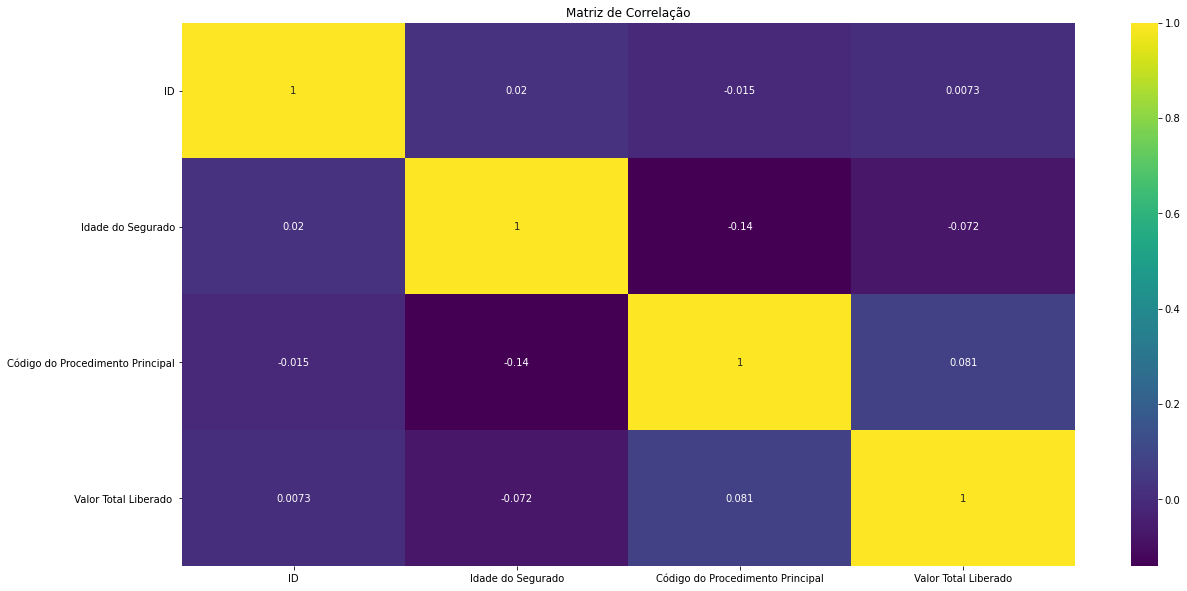

In [51]:
#Gerando matriz de correlação
plt.figure(figsize=(20,10))
ax = plt.axes()
sns.heatmap(df.corr(), annot=True, cmap="viridis")
ax.set_title("Matriz de Correlação")

Text(0.5, 1.0, 'Q-Q para conferir a distribuição de Frequência')

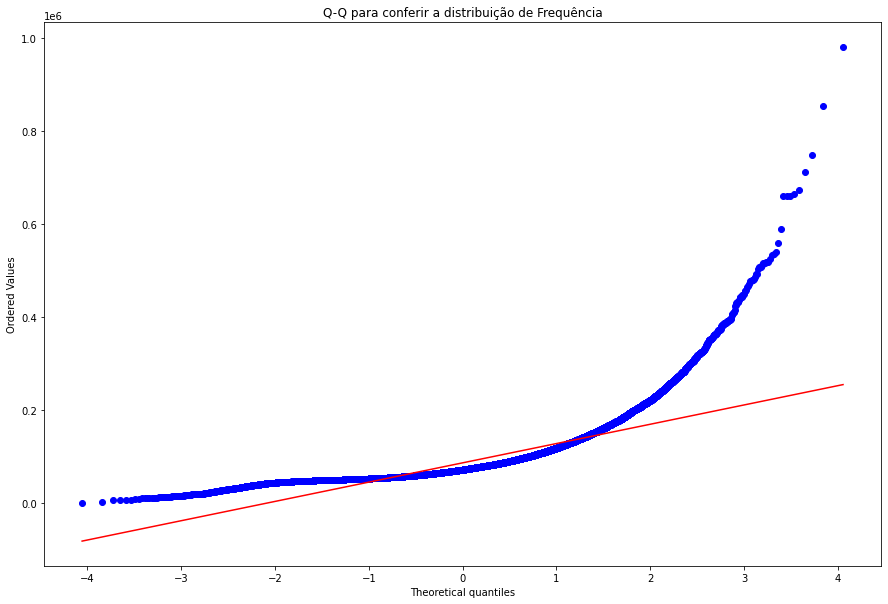

In [105]:
#Gerando o gráfico de QQ
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
res = stats.probplot(df[" Valor Total Liberado "], dist="norm",plot=ax)
ax.set_title("Q-Q para conferir a distribuição de Frequência")

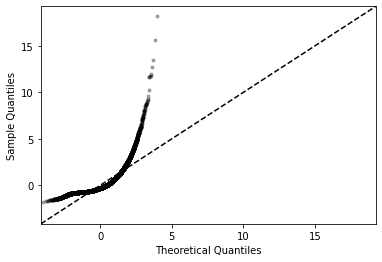

In [106]:
#Utilizando a biblioteca statsmodels.api
pp = sm.ProbPlot(df[" Valor Total Liberado "], fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='k', alpha=0.3)
sm.qqline(qq.axes[0], line='45', fmt='k--')

plt.show()

Podemos verificar no gráfico acima de QQ, que temos uma amostragem que não segue a normal teórica, Constatando-se assim que não é uma distribuição normal. Analisando os dados temos:

*   Limite inferior: 490,9
*   Primeiro Quartil: 56614,9
*   Mediana: 71866,1
*   Média: 86508,7
*   Terceiro Quartil: 98470,7
*   Limite superior: 980639,4


